In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

num_points = 2000
vectors_set = []

for i in xrange(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([np.random.normal(0.0, 0.9),
                           np.random.normal(0.0, 0.9)])
    else :
        vectors_set.append([np.random.normal(3.0, 0.5),
                          np.random.normal(1.0, 0.5)])

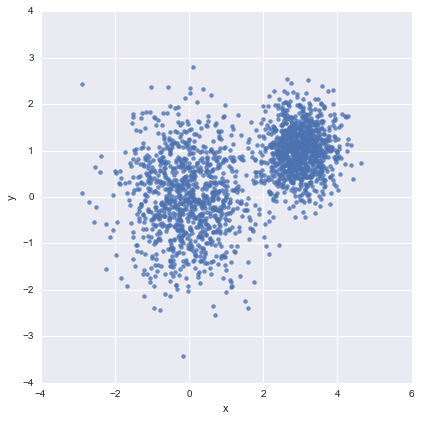

In [4]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({"x": [v[0] for v in vectors_set],
                  "y": [v[1] for v in vectors_set]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

In [12]:
import tensorflow as tf

# create constant tensor
vectors = tf.constant(vectors_set)
print vectors.get_shape()

# set initial centroides by random numbers
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))
print centroides.get_shape()

# add dimension
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroides)), 2), 0)

means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors, 
    tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])),
    reduction_indices=[1]) for c in xrange(k)])

update_centroides = tf.assign(centroides, means)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

for step in xrange(100):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])

print centroid_values

(2000, 2)
(4, 2)
[[-0.78578663 -0.63173008]
 [-0.21158966  0.86540186]
 [ 2.97666144  1.01342225]
 [ 0.70036948 -0.45849803]]


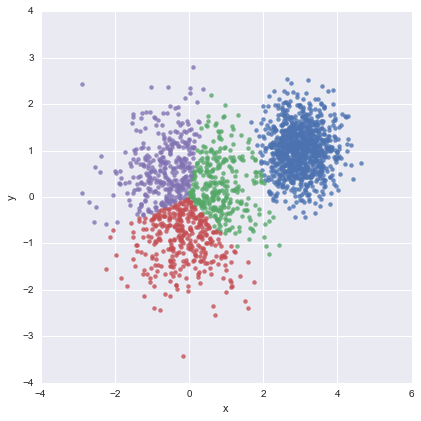

In [7]:
# drawing plot
data = {"x": [], "y": [], "cluster": []}

for i in xrange(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])
    
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)

plt.show()